In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#------------------------------------------------------------------------------#
#----- Studies from Internet research about interest formulas and timing. -----#
#------------------------------------------------------------------------------#
def calc_remaining_balance(princ, annual_int_rate, compounds_per_year, monthly_pay, total_compounds):
    """
    Return the remaining balance on a loan, given:
        - the initial principal amount of the loan (princ).
        - the annual interest rate, also called "APR" (annual_int_rate)
        - the number of times the interest compounds PER YEAR (compounds_per_year)
        - the monthly payment towards the loan - must be constant! (monthly_pay)
        - the total number of compounds that happen - can think of this like the number of months (total_compounds)
    """
    p = princ
    r = annual_int_rate
    n = compounds_per_year
    m = monthly_pay
    c = total_compounds
    
    int_factor = 1 + r/n
    
    return p*(int_factor**c) - m*n/r*(int_factor**c - 1)

def calc_monthly_payment(princ, annual_int_rate, compounds_per_year, total_compounds):
    """
    Return the remaining balance on a loan, given:
        - the initial principal amount of the loan (princ).
        - the annual interest rate, also called "APR" (annual_int_rate)
        - the number of times the interest compounds PER YEAR (compounds_per_year)
        - the total number of compounds that happen - can think of this like the number of months (total_compounds)
    """
    p = princ
    r = annual_int_rate
    n = compounds_per_year
    c = total_compounds
    
    ratio = r/n
    numer = ratio * p
    denom = 1 - (1 + ratio)**(-c)
    return numer / denom

#-------------------------------------------------------------------#
#----- It works! This calculates our monthly mortgage payment! -----#
#-------------------------------------------------------------------#
calc_monthly_payment(160050, 0.04875, 12, 30*12)

846.9977622708516

# Old code, more robust

In [ ]:
def run_payment_scheme(starting_principal, 
                       interest_rate,  # monthly interest rate
                       monthly_payment,
                       down_payment=0,
                       pay_up_front_amt=0,
                       pay_up_front_perc=0,
                       verbose=False):

    """
    Assumes interest is compounded monthly. 
    
    Default monthly payment should be obtained from exponential formula?
    """
    
    if (pay_up_front_amt != 0) and (pay_up_front_perc !=0):
            raise ValueError("Both pay_up_front_amt and pay_up_front_perc should not both be given.")
    
    remaining_balance = starting_principal - pay_up_front_amt

    # Make sure that the monthly payment can at least beat the first month's generated interest.
    interest = interest_rate * remaining_balance
    if (monthly_payment < interest):
        err_msg = f"monthly_payment (${monthly_payment:.2f}) is smaller than first month's generated interest (${interest:.2f})!"
        raise ValueError(err_msg)

    accrued_interest = 0
    count = 0
    while (remaining_balance > 0):
        count += 1
        
        interest = interest_rate * remaining_balance
        accrued_interest += interest
        
        pay_towards_prin = monthly_payment - interest
        
        if remaining_balance < pay_towards_prin:
            monthly_payment = remaining_balance
            
        remaining_balance -= pay_towards_prin

        perc_int = interest / monthly_payment * 100
        perc_princ = 100 - perc_int
            
        if (verbose):
            print(f"""
Month {count}:
    remaining principal:\t\t${remaining_balance:.2f}
    monthly payment:\t\t\t${monthly_payment}
        amt towards principal:\t\t${(monthly_payment - interest):.2f} ({perc_princ:.2f}%)
        amt towards interest:\t\t${interest:.2f} ({perc_int:.2f}%)
    interest accrued this month:\t${interest:.2f}
    total accrued interest:\t\t${accrued_interest:.2f}
    remaining_balance is now:\t\t${remaining_balance:.2f}
        """)
    if (verbose): print(f"It will take {count} months to pay the pipes off!")

# New code, quick and dirty.

In [3]:
def run_payment_scheme(starting_principal, 
                       interest_rate,  # monthly interest rate
                       monthly_payment,
                       down_payment=0,
                       verbose=False):

    """
    Assumes interest is compounded monthly. 
    
    Default monthly payment should be obtained from formula based on how long we want to pay the loan for?
    """
    
    remaining_principal = starting_principal - down_payment

    # Make sure that the monthly payment can at least beat the first month's generated interest.
    interest = interest_rate * remaining_principal
    if (monthly_payment < interest):
        err_msg = f"monthly_payment (${monthly_payment:.2f}) is smaller than first month's generated interest (${interest:.2f})!"
        raise ValueError(err_msg)

    if (interest_rate > 0.50):
        raise ValueError(f"Your given interest_rate ({interest_rate}) is > 0.50. Are you sure that is correct?")
        
    accrued_interest = 0
    count = 0
    int_over_time_list = [0]
    princ_over_time_list = []
    
    while (remaining_principal > 0):
        count += 1
        
        interest = interest_rate * remaining_principal
        accrued_interest += interest

        int_over_time_list.append(accrued_interest)
        princ_over_time_list.append(remaining_principal)

        pay_towards_prin = monthly_payment - interest
        
        if remaining_principal < pay_towards_prin:
            pay_towards_prin = remaining_principal
            monthly_payment = remaining_principal
            
        remaining_principal -= pay_towards_prin

        perc_int = interest / monthly_payment * 100
        perc_princ = 100 - perc_int
        
        if (verbose):
            print(f"""
Month {count}:
    remaining principal:\t\t${remaining_principal:.2f}
    monthly payment:\t\t\t${monthly_payment:.2f}
        amt towards principal:\t\t${(pay_towards_prin):.2f} ({perc_princ:.2f}%)
        amt towards interest:\t\t${interest:.2f} ({perc_int:.2f}%)
    interest accrued this month:\t${interest:.2f}
    total accrued interest:\t\t${accrued_interest:.2f}
    remaining_principal is now:\t\t${remaining_principal:.2f}
        """)
    if (verbose): print(f"It will take {count} months to pay this loan off!")
        
    princ_over_time_list.append(0)
    return princ_over_time_list, int_over_time_list

In [61]:
p,i = run_payment_scheme(4000, 0.0899/12, 100.00, verbose=True)


Month 1:
    remaining principal:		$3929.97
    monthly payment:			$100.00
        amt towards principal:		$70.03 (70.03%)
        amt towards interest:		$29.97 (29.97%)
    interest accrued this month:	$29.97
    total accrued interest:		$29.97
    remaining_principal is now:		$3929.97
        

Month 2:
    remaining principal:		$3859.41
    monthly payment:			$100.00
        amt towards principal:		$70.56 (70.56%)
        amt towards interest:		$29.44 (29.44%)
    interest accrued this month:	$29.44
    total accrued interest:		$59.41
    remaining_principal is now:		$3859.41
        

Month 3:
    remaining principal:		$3788.32
    monthly payment:			$100.00
        amt towards principal:		$71.09 (71.09%)
        amt towards interest:		$28.91 (28.91%)
    interest accrued this month:	$28.91
    total accrued interest:		$88.32
    remaining_principal is now:		$3788.32
        

Month 4:
    remaining principal:		$3716.70
    monthly payment:			$100.00
        amt towards principal:

In [8]:
def plot_PandI_over_time(p,i):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(range(len(p)), p, label="Principal")
    ax.plot(range(len(i)), i, label="Accrued Interest")
    ax.legend()
    ax.set_xlabel("Month")
    ax.set_ylabel("Dolla Dolla Bills Y'all ($)")

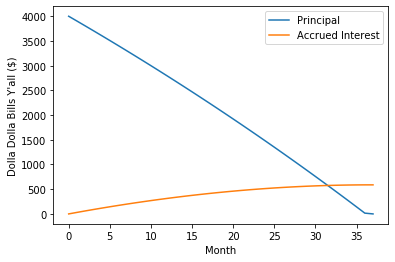

In [9]:
p, i = run_payment_scheme(4000.00,
                   0.0910/12,
                   127.00,
                   verbose=False)

plot_PandI_over_time(p,i)

In [ ]:
p, i = run_payment_scheme(6000.00,
                   0.0899/12,
                   100.00,
                   verbose=False)

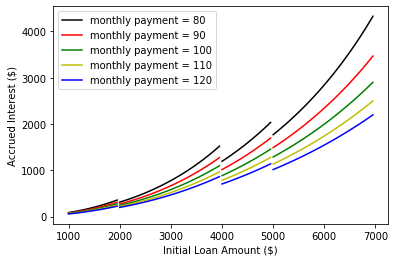

In [7]:
# monthly_payment = 100

monthly_payment_list = [80,90,100,110,120]

fig, ax = plt.subplots(nrows=1,ncols=1)

color_dict = {
    0:'k',
    1:'r',
    2:'g',
    3:'y',
    4:'b',
}

for count,monthly_payment in enumerate(monthly_payment_list):
    
    acc_interest_per_scheme_1Kto2K = []
    acc_interest_per_scheme_2Kto4K = []
    acc_interest_per_scheme_4Kto5K = []
    acc_interest_per_scheme_5Kto7K = []

    for init_princ in np.arange(1000, 2000, 50):
        p, i = run_payment_scheme(init_princ, 0.1399/12, monthly_payment)
        acc_interest_per_scheme_1Kto2K.append( i[-1] )

    for init_princ in np.arange(2000, 4000, 50):
        p, i = run_payment_scheme(init_princ, 0.1199/12, monthly_payment)
        acc_interest_per_scheme_2Kto4K.append( i[-1] )

    for init_princ in np.arange(4000, 5000, 50):
        p, i = run_payment_scheme(init_princ, 0.0999/12, monthly_payment)
        acc_interest_per_scheme_4Kto5K.append( i[-1] )

    for init_princ in np.arange(5000, 7000, 50):
        p, i = run_payment_scheme(init_princ, 0.0899/12, monthly_payment)
        acc_interest_per_scheme_5Kto7K.append( i[-1] )
            
    ax.plot(np.arange(1000, 2000, 50), acc_interest_per_scheme_1Kto2K, color=color_dict[count])
    ax.plot(np.arange(2000, 4000, 50), acc_interest_per_scheme_2Kto4K, color=color_dict[count])
    ax.plot(np.arange(4000, 5000, 50), acc_interest_per_scheme_4Kto5K, color=color_dict[count])
    ax.plot(np.arange(5000, 7000, 50), acc_interest_per_scheme_5Kto7K, color=color_dict[count], label=f"monthly payment = ${monthly_payment}/mo")
    
ax.set_xlabel("Initial Loan Amount ($)")
ax.set_ylabel("Accrued Interest ($)")
ax.legend()


#--- User puts in the ranges of loan amounts and the corresponding APR.
#----- Use a function on each range.
# def get_accrued_interest_list(init_princ, loan_princ):
#     acc_int = []
#     for init_princ in np.arange(1000, 2000, 50):
#         p, i = run_payment_scheme(init_princ, 0.1399/12, monthly_payment)
#         acc_interest_per_scheme_1Kto2K.append( i[-1] )